In [ ]:
#Product Purchase Prediction

In [173]:
#Importing necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [174]:
train= pd.read_csv(r"E:\Data Trained_ Training\Hackathon\Analytics Vidhya\Product Demand\train_wn75k28.csv")
test= pd.read_csv(r"E:\Data Trained_ Training\Hackathon\Analytics Vidhya\Product Demand\test_Wf7sxXF.csv")
submission= pd.read_csv(r"E:\Data Trained_ Training\Hackathon\Analytics Vidhya\Product Demand\sample_submission_2zvVjBu.csv")

In [175]:
train.shape, test.shape, submission.shape

((39161, 19), (13184, 18), (13184, 2))

In [176]:
print("=========================TRAIN DATASET=================================\n"), 
train.head()

=========================TRAIN DATASET=================================



,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,2021-01-01,4,6,NaN,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0


In [177]:
print("=========================TEST DATASET=================================\n"), 
test.head()

=========================TEST DATASET=================================



,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12
0,39162,2022-01-01,2,2,NaN,2021-08-17,1,1,0,0,0,1,0,0,0,0,1,0
1,39163,2022-01-01,4,7,3.0,2020-05-21,1,0,0,0,0,0,0,1,0,0,0,0
2,39164,2022-01-01,8,7,NaN,NaN,0,0,0,0,1,1,0,0,0,0,0,0
3,39165,2022-01-01,9,8,2.0,2020-06-22,0,0,0,0,1,1,1,0,0,0,2,0
4,39166,2022-01-01,4,5,2.0,2021-03-10,1,0,0,0,0,0,0,0,0,0,0,0


In [178]:
print("\n=========================SUBMISSION DATASET=================================\n"), 
submission.head()


=========================SUBMISSION DATASET=================================



,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [179]:
print("=========================TRAIN DATASET=================================\n"), 
train.info(), 
print("\n=========================TEST DATASET=================================\n"), 
test.info(),   
print("\n=========================SUBMISSION DATASET=================================\n"), 
submission.info()

=========================TRAIN DATASET=================================

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39161 entries, 0 to 39160
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    39161 non-null  int64  
 1   created_at            39161 non-null  object 
 2   campaign_var_1        39161 non-null  int64  
 3   campaign_var_2        39161 non-null  int64  
 4   products_purchased    18250 non-null  float64
 5   signup_date           24048 non-null  object 
 6   user_activity_var_1   39161 non-null  int64  
 7   user_activity_var_2   39161 non-null  int64  
 8   user_activity_var_3   39161 non-null  int64  
 9   user_activity_var_4   39161 non-null  int64  
 10  user_activity_var_5   39161 non-null  int64  
 11  user_activity_var_6   39161 non-null  int64  
 12  user_activity_var_7   39161 non-null  int64  
 13  user_activity_var_8   39161 non-null  int64  
 1

In [180]:
print("=========================TRAIN DATASET=================================\n"), 
train.isnull().sum()

=========================TRAIN DATASET=================================



id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [181]:
print("=========================TEST DATASET=================================\n"), 
test.isnull().sum()

=========================TEST DATASET=================================



id                         0
created_at                 0
campaign_var_1             0
campaign_var_2             0
products_purchased      8136
signup_date             6649
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
dtype: int64

In [182]:
print("=========================SUBMISSION DATASET=================================\n"), 
submission.isnull().sum().sum()

=========================SUBMISSION DATASET=================================



0

In [183]:
print("=========================TRAIN DATASET=================================\n"), 
sum(train.duplicated())

=========================TRAIN DATASET=================================



0

In [184]:
print("=========================TEST DATASET=================================\n"), 
sum(test.duplicated())

=========================TEST DATASET=================================



0

In [185]:
print("=========================SUBMISSION DATASET=================================\n"), 
sum(submission.duplicated())

=========================SUBMISSION DATASET=================================



0

In [186]:
# filling missing values

In [187]:
train['products_purchased'] = train['products_purchased'].fillna(0)
test['products_purchased'] = test['products_purchased'].fillna(0)

In [188]:
train['signup_date'] = train['signup_date'].fillna(train['created_at'][0])
test['signup_date'] = test['signup_date'].fillna(test['created_at'][0])

In [189]:
#converting column type float to int

In [190]:
train["products_purchased"] = train["products_purchased"].astype(int)
test["products_purchased"] = test["products_purchased"].astype(int)

In [191]:
#converting column type string to date

In [192]:
train['created_at']= pd.to_datetime(train['created_at'])
test['created_at']= pd.to_datetime(test['created_at'])

In [193]:
train['signup_date']= pd.to_datetime(train['signup_date'])
test['signup_date']= pd.to_datetime(test['signup_date'])

In [194]:
#splitting date column into monthand day column

In [195]:
train['created_at_year'] = train['created_at'].dt.year
train['created_at_month'] = train['created_at'].dt.month
train['created_at_day'] = train['created_at'].dt.day
train['created_at_dayofweek'] = train['created_at'].dt.dayofweek

test['created_at_year'] = test['created_at'].dt.year
test['created_at_month'] = test['created_at'].dt.month
test['created_at_day'] = test['created_at'].dt.day
test['created_at_dayofweek'] = test['created_at'].dt.dayofweek

In [196]:
train['signup_date_year'] = train['signup_date'].dt.year
train['signup_date_month'] = train['signup_date'].dt.month
train['signup_date_day'] = train['signup_date'].dt.day
train['signup_date_dayofweek'] = train['signup_date'].dt.dayofweek

test['signup_date_year'] = test['signup_date'].dt.year
test['signup_date_month'] = test['signup_date'].dt.month
test['signup_date_day'] = test['signup_date'].dt.day
test['signup_date_dayofweek'] = test['signup_date'].dt.dayofweek

In [197]:
#droping columns

In [198]:
train.drop(['created_at'],inplace=True,axis=1)
train.drop(['signup_date'],inplace=True,axis=1)
test.drop(['created_at'],inplace=True,axis=1)
test.drop(['signup_date'],inplace=True,axis=1)

In [199]:
#Target  variable

<AxesSubplot:>

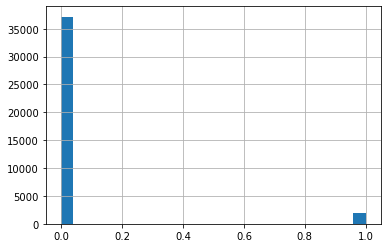

In [200]:
train['buy'].hist(bins=25)

In [201]:
# Independent and Target variable EDA

<AxesSubplot:xlabel='products_purchased'>

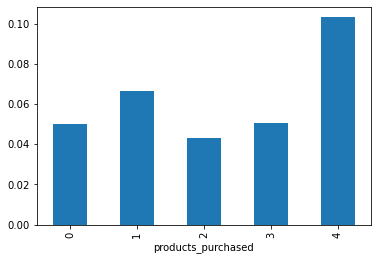

In [202]:
train.groupby('products_purchased').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='campaign_var_1'>

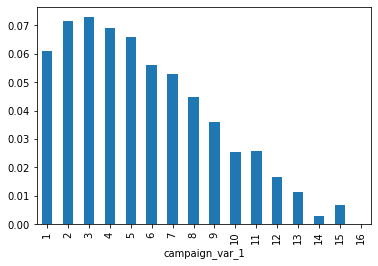

In [203]:
train.groupby('campaign_var_1').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='campaign_var_2'>

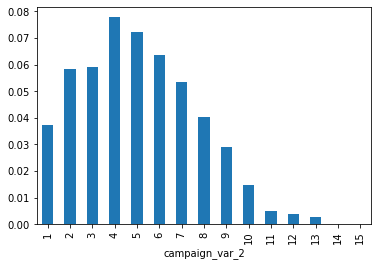

In [204]:
train.groupby('campaign_var_2').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_1'>

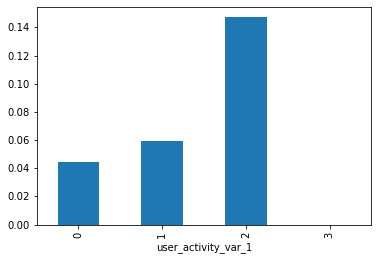

In [205]:
train.groupby('user_activity_var_1').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_2'>

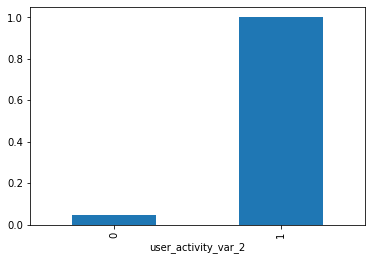

In [206]:
train.groupby('user_activity_var_2').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_3'>

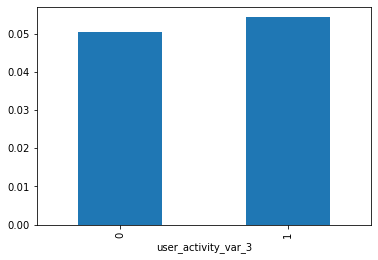

In [207]:
train.groupby('user_activity_var_3').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_4'>

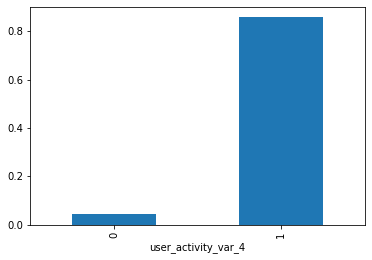

In [208]:
train.groupby('user_activity_var_4').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_5'>

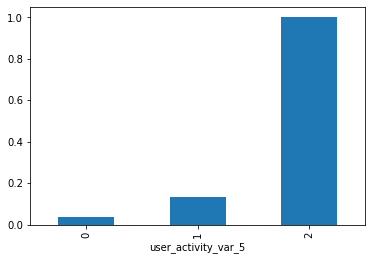

In [209]:
train.groupby('user_activity_var_5').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_6'>

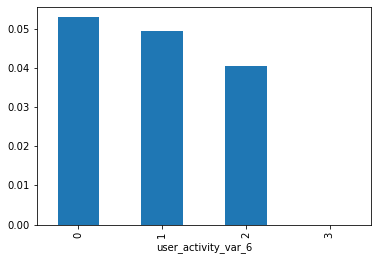

In [210]:
train.groupby('user_activity_var_6').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_7'>

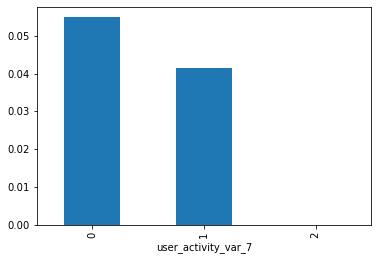

In [211]:
train.groupby('user_activity_var_7').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_8'>

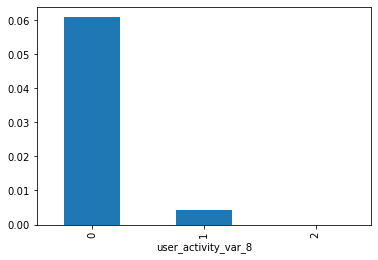

In [212]:
train.groupby('user_activity_var_8').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_9'>

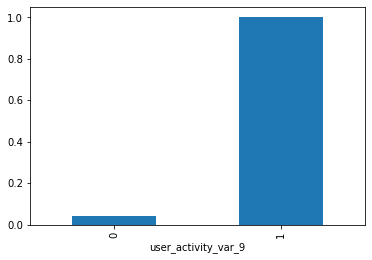

In [213]:
train.groupby('user_activity_var_9').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_10'>

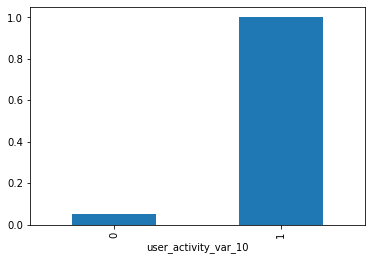

In [214]:
train.groupby('user_activity_var_10').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_11'>

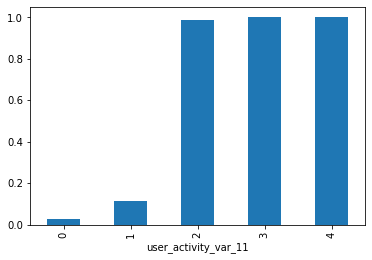

In [215]:
train.groupby('user_activity_var_11').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='user_activity_var_12'>

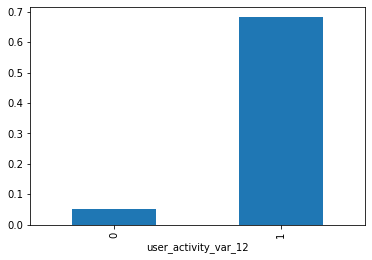

In [216]:
train.groupby('user_activity_var_12').mean()['buy'].plot(kind='bar')

<AxesSubplot:xlabel='created_at_month'>

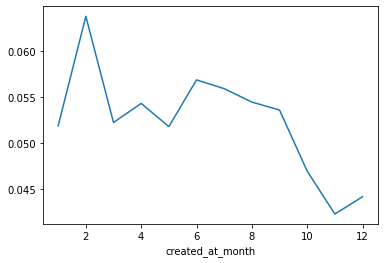

In [217]:
train.groupby('created_at_month').mean()['buy'].plot(kind='line')

<AxesSubplot:xlabel='created_at_day'>

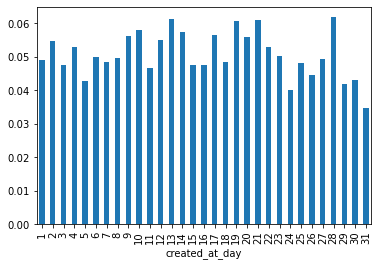

In [218]:
train.groupby('created_at_day').mean()['buy'].plot(kind='bar')

In [219]:
# Correlation between variables

<AxesSubplot:>

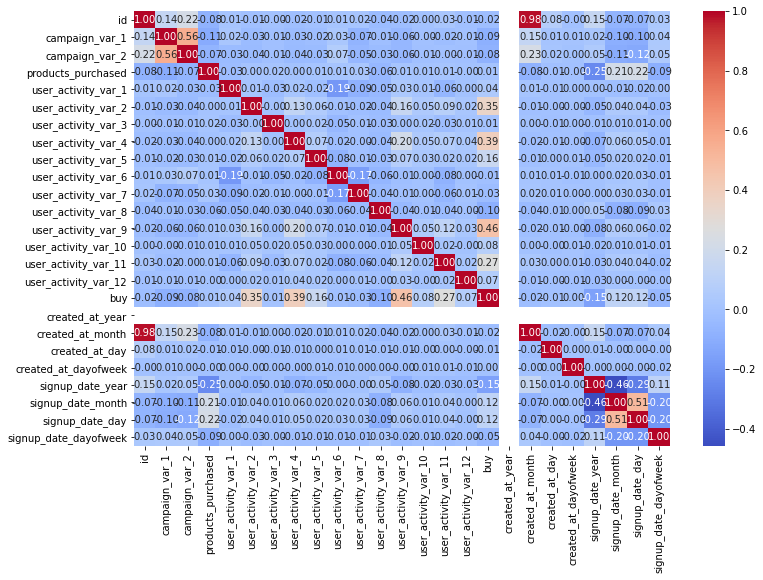

In [220]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

sns.heatmap(train.corr(), fmt='.2f', annot=True, cmap='coolwarm')

In [221]:
#splitting independent and target variable

In [222]:
y_train=train[['buy']]
X_train=train.drop(['buy'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (39161, 1)
X_train : (39161, 24)


In [223]:
# Balancing Target variable

<AxesSubplot:ylabel='None'>

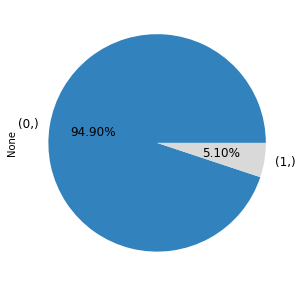

In [224]:
y_train.value_counts().plot(kind = "pie",autopct='%1.2f%%',fontsize=12,figsize=(5,5),colormap='tab20c')

In [225]:
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

In [226]:
# define dataset
X_train, y_train = make_classification(n_samples=10000, weights=[0.99], flip_y=0)
smote = SMOTE()
x_smote, y_smote = smote.fit_resample(X_train, y_train)
  
# print the features and the labels
print('x_smote:\n', x_smote.shape)
print('y_smote:\n', y_smote.shape)

x_smote:
 (19800, 20)
y_smote:
 (19800,)


In [227]:
#Normalization

In [228]:
from sklearn.preprocessing import power_transform
X=power_transform(x_smote,method='yeo-johnson')
X

array([[ 2.8764466 ,  0.92329923,  1.37595441, ...,  1.19558094,
        -0.14809101,  0.39474032],
       [-1.79643653, -0.65340832,  1.08702609, ...,  0.15729805,
        -0.02276469,  1.7905424 ],
       [ 0.2725666 ,  1.36252236, -0.77466829, ..., -0.13058931,
        -1.91299426,  0.38043244],
       ...,
       [ 0.70235039,  0.29373627,  1.14526982, ...,  0.22190122,
        -1.14388076, -0.57952778],
       [-1.57817402,  0.69133947,  0.49308772, ...,  1.23742982,
        -0.44275216,  0.19326877],
       [-0.02366009, -2.50058025, -0.07629354, ..., -0.52631273,
         0.26278683,  1.05875111]])

##### Spliting of dataset into Train and Test data

In [229]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y_smote, test_size = 0.25, random_state = 440)

print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(14850, 20)
(14850,)
(4950, 20)
(4950,)


In [230]:
#Standarization

In [231]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
Xtrain = sc.fit_transform(Xtrain)
print(Xtrain)
Xtest = sc.fit_transform(Xtest)
print(Xtest)

[[-0.7403993  -0.32740508  1.24080455 ... -2.15518291 -1.18696299
   1.3512236 ]
 [-1.77357548 -0.54377119 -3.54134473 ...  0.38940026 -0.43106732
   0.73388714]
 [ 0.378692   -0.70327364  0.82385097 ... -0.46115727 -0.94949825
  -0.68332549]
 ...
 [ 0.21796216  0.0504006  -1.23217697 ... -0.69037676 -0.15039563
   1.04650513]
 [ 1.29284028  0.85656703  1.34180379 ... -0.61717696 -0.78434743
   0.19217006]
 [-0.56029406 -1.29938046 -1.2427309  ... -0.49435213 -1.51425437
   0.10766119]]
[[ 0.50417682 -0.37561191  1.21845156 ... -0.00608531  1.79431139
  -1.57718897]
 [-1.24187119  1.3288367   0.00829107 ... -1.30042831  0.18647574
   2.00379038]
 [-0.03339464 -1.79836002  0.34279479 ... -0.65299596  1.97975741
   0.39455248]
 ...
 [-2.13556684 -0.43282394 -1.0732912  ...  1.25117103 -0.81954677
  -0.28615075]
 [ 0.46517421 -0.75533803 -0.2973429  ... -0.88281604  1.04150958
  -0.36745205]
 [-0.90081925 -0.39358112  0.43378812 ... -0.49250036  0.35829991
  -0.72814909]]


In [232]:
#Modeling

In [233]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [234]:
#XGBoost:

In [235]:
xgbr = xgb.XGBClassifier(learning_rate=0.05, objective='reg:squarederror', n_estimators=50, max_depth=3)
xgbr.fit(Xtrain, ytrain)

xgbrp = xgbr.predict(Xtest)

# Evaluation
print('F1 score:', f1_score(ytest, xgbrp.round(),average='weighted'))

F1 score: 0.9059315187176338


In [236]:
#LGBM

In [237]:
lgbr = lgb.LGBMClassifier(learning_rate=0.05, n_estimators=1000, max_depth=3)
lgbr.fit(Xtrain, ytrain)

lgbp = lgbr.predict(Xtest)

#Evaluation
print('F1 score:', f1_score(ytest, lgbp.round(),average='weighted'))

F1 score: 0.9919183395674174


In [238]:
#Hyper-Parameter Tuning

In [240]:
#LightGBM Regressor

In [241]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

lgsv = GridSearchCV(
            estimator=LGBMClassifier(),
            param_grid={"estimator__boosting_type":('rf', 'dart'),"estimator__learning_rate": (0.05, 0.01),\
                 "estimator__n_estimators": (50, 100), "estimator__max_bin": (32, 64),
                 "estimator__max_depth": (3, 5), "estimator__num_leaves": (32,64)},
            cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

lreg = lgsv.fit(Xtrain, ytrain)
print(lreg.best_params_, "\n\n\n")
print('F1 score:', f1_score(ytest, lreg.predict(Xtest).round(),average='weighted'))

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[LightGBM] [Warning] Unknown parameter: estimator__max_depth
[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__boosting_type
[LightGBM] [Warning] Unknown parameter: estimator__learning_rate
[LightGBM] [Warning] Unknown parameter: estimator__max_bin
[LightGBM] [Warning] Unknown parameter: estimator__num_leaves
{'estimator__boosting_type': 'rf', 'estimator__learning_rate': 0.05, 'estimator__max_bin': 32, 'estimator__max_depth': 3, 'estimator__n_estimators': 50, 'estimator__num_leaves': 32} 



F1 score: 0.9935350115629422


In [242]:
#Retraining

In [243]:
y_train=train[['buy']]
X_train=train.drop(['buy'],axis=1)

print("y_train :",y_train.shape)
print("X_train :",X_train.shape)

y_train : (39161, 1)
X_train : (39161, 24)


In [244]:
PScaler=StandardScaler()
PScalerFit=PScaler.fit(X_train)
x_train=PScalerFit.transform(X_train)
print("x_train :",x_train.shape)
print("y_train :",y_train.shape)


x_train : (39161, 24)
y_train : (39161, 1)


In [245]:
#Model Testing

In [246]:
lgbr = lgb.LGBMClassifier(estimator__boosting_type='rf', estimator__learning_rate= 0.05, estimator__max_bin= 32, estimator__max_depth= 3, estimator__n_estimators= 50, estimator__num_leaves= 32)
lgbr.fit(X_train, y_train)

testpred = lgbr.predict(test)

[LightGBM] [Warning] Unknown parameter: estimator__max_depth
[LightGBM] [Warning] Unknown parameter: estimator__n_estimators
[LightGBM] [Warning] Unknown parameter: estimator__boosting_type
[LightGBM] [Warning] Unknown parameter: estimator__learning_rate
[LightGBM] [Warning] Unknown parameter: estimator__max_bin
[LightGBM] [Warning] Unknown parameter: estimator__num_leaves


In [251]:
print(testpred)

[1 0 0 ... 0 0 0]


In [247]:
#submission

In [248]:
submissions = pd.DataFrame({
    'id': test.id,
    'buy': np.round(testpred, 0)
})
submissions['buy'] = submissions['buy'].astype('int')
submissions.to_csv('submission.csv', index=False)